In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

COLUMNS = ['Date','Total_Cases','New_Daily_Cases','New_Daily_Deaths','Total_Deaths','Total_Recoveries']

In [2]:
import requests
import sys
import csv
import datetime

def generate_csv(code):
    url = "https://thevirustracker.com/free-api?countryTimeline=" + code

    r = requests.get(url, headers={"User-Agent": "XY"})

    data = r.json()
    keys = data['timelineitems'][0].keys()
    length = len(keys)
    name = "covid" + code + ".csv"
    with open(name, 'w', newline='') as file:
                writer = csv.writer(file)
                for key in keys:
                    if length > 1:
                        row = []
                        #x = datetime.datetime.strptime(key, '%m/%d/%y')
                        #xn = x - datetime.timedelta(days=1)
                        #date = xn.strftime("%m/%d/%y")
                        row.append(key)
                        row.append(data['timelineitems'][0][key]['total_cases'])
                        row.append(data['timelineitems'][0][key]['new_daily_cases'])
                        row.append(data['timelineitems'][0][key]['new_daily_deaths'])
                        row.append(data['timelineitems'][0][key]['total_deaths'])
                        row.append(data['timelineitems'][0][key]['total_recoveries'])
                        writer.writerow(row)
                        length-=1

In [3]:
def create_dataset(siglas):
    result = pd.DataFrame()
    for i in siglas:
        t = generate_csv(i)
        t_d = pd.read_csv('covid'+i+'.csv')
        tmp = [j+i for j in COLUMNS[1:]]
        tmp.insert(0,'Date')
        t_d.columns = tmp
        t_d.set_index('Date', inplace=True, drop=True)
        result = pd.concat([result,t_d], axis=1, sort=True)    

In [4]:
generate_csv("PT")
generate_csv("IT")
generate_csv("ES")

In [5]:
dataPT = pd.read_csv('covidPT.csv')
tmp = [i+"PT" for i in COLUMNS[1:]]
tmp.insert(0,'Date')
dataPT.columns = tmp
dataPT.set_index('Date', inplace=True, drop=True)
dataPT.tail()

dataPT.to_csv('../predictions/test.csv')

In [6]:
dataES = pd.read_csv('covidES.csv')
tmp = [i+"ES" for i in COLUMNS[1:]]
tmp.insert(0,'Date')
dataES.columns = tmp
dataES.set_index('Date', inplace=True, drop=True)

dataIT = pd.read_csv('covidIT.csv')
tmp = [i+"IT" for i in COLUMNS[1:]]
tmp.insert(0,'Date')
dataIT.columns = tmp
dataIT.set_index('Date', inplace=True, drop=True)
dataIT.tail()

,Total_CasesIT,New_Daily_CasesIT,New_Daily_DeathsIT,Total_DeathsIT,Total_RecoveriesIT
Date,,,,,
4/13/20,159516,3153,566,20465,7024
4/14/20,162488,2972,602,21067,7024
4/15/20,165155,2667,578,21645,7024
4/16/20,168941,3786,525,22170,7024
4/17/20,172434,3493,575,22745,7024


In [29]:
# Visualization
X = dataPT.drop(columns=['New_Daily_Deaths','Date'], axis=0)
y = dataPT['New_Daily_Deaths']

time = dataIT.drop(columns=['New_Daily_Deaths','New_Daily_Cases','Total_Deaths','Total_Recoveries'], axis=0)
time.head()
sb.lineplot('Date','Total_Cases',data=time)

KeyError: "['New_Daily_Deaths' 'Date'] not found in axis"

In [30]:
def create_dataset_v2(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [64]:
from sklearn.preprocessing import MinMaxScaler
values = dataIT[['Total_CasesIT']].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

train_size = int(len(scaled) * 0.85)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

trainX, trainY = create_dataset_v2(train, 5)
testX, testY = create_dataset_v2(test, 5)

print(trainX.shape)

trainX = np.reshape(trainX, (trainX.shape[0], 5, 1))
testX = np.reshape(testX, (testX.shape[0], 5, 1))

print(trainX.shape)
print(trainX[:5])
print(testX[:5])

56 11
(51, 5)
(51, 5, 1)
[[[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]

 [[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]

 [[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [6.962625e-06]]

 [[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [6.962625e-06]
  [6.962625e-06]]

 [[0.000000e+00]
  [0.000000e+00]
  [6.962625e-06]
  [6.962625e-06]
  [6.962625e-06]]]
[[[0.7083565 ]
  [0.736576  ]
  [0.7698713 ]
  [0.8023728 ]
  [0.83429646]]

 [[0.736576  ]
  [0.7698713 ]
  [0.8023728 ]
  [0.83429646]
  [0.86775184]]

 [[0.7698713 ]
  [0.8023728 ]
  [0.83429646]
  [0.86775184]
  [0.89780253]]

 [[0.8023728 ]
  [0.83429646]
  [0.86775184]
  [0.89780253]
  [0.92286104]]

 [[0.83429646]
  [0.86775184]
  [0.89780253]
  [0.92286104]
  [0.94402045]]]


In [32]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model_ls = Sequential()
model_ls.add(LSTM(18,return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2])))
model_ls.add(Dropout(0.2))
model_ls.add(LSTM(18))
model_ls.add(Dropout(0.5))
model_ls.add(Dense(1, activation='linear'))
model_ls.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
history = model_ls.fit(trainX, trainY, epochs=100, batch_size=16, validation_data=(testX,testY), shuffle=False)


Train on 51 samples, validate on 6 samples
Epoch 1/100
51/51 [==============================] - 3s 55ms/sample - loss: 0.0380 - accuracy: 0.0196 - val_loss: 0.4351 - val_accuracy: 0.0000e+00
Epoch 2/100
51/51 [==============================] - 0s 631us/sample - loss: 0.0375 - accuracy: 0.0196 - val_loss: 0.4351 - val_accuracy: 0.0000e+00
Epoch 3/100
51/51 [==============================] - 0s 600us/sample - loss: 0.0355 - accuracy: 0.0196 - val_loss: 0.4351 - val_accuracy: 0.0000e+00
Epoch 4/100
51/51 [==============================] - 0s 602us/sample - loss: 0.0354 - accuracy: 0.0196 - val_loss: 0.4190 - val_accuracy: 0.0000e+00
Epoch 5/100
51/51 [==============================] - 0s 623us/sample - loss: 0.0309 - accuracy: 0.0196 - val_loss: 0.3816 - val_accuracy: 0.0000e+00
Epoch 6/100
51/51 [==============================] - 0s 638us/sample - loss: 0.0280 - accuracy: 0.0196 - val_loss: 0.3395 - val_accuracy: 0.0000e+00
Epoch 7/100
51/51 [==============================] - 0s 569us/sa

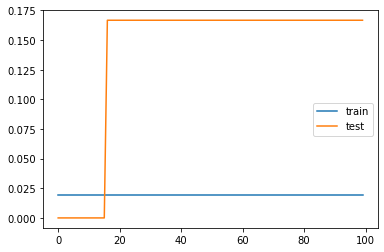

In [69]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [19]:
predictions = model_ls.predict(testX)
print(scaler.inverse_transform(predictions))

[[39628.58 ]
 [44803.42 ]
 [50227.754]
 [55578.277]
 [61252.895]
 [66529.46 ]
 [71681.29 ]]


In [7]:
def prepare_dataset(dataset, timesteps=5, multisteps=1):
    data = dataset.values
    X=[]
    y=[]
    for i in range(dataset.shape[0] - (timesteps + multisteps)):
        input_index = i + timesteps
        label_index = input_index + multisteps
        X.append(data[i:input_index,:])
        y.append(data[input_index:label_index,0])
    return X,y

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Prepare data from LSTM
data_lstm = dataIT.drop(columns=['New_Daily_CasesIT','New_Daily_DeathsIT','Total_DeathsIT','Total_RecoveriesIT'], axis=0)
#data_lstm['Date'] = range(0,len(dataIT_dates))
#print(data_lstm.head)

scaler = MinMaxScaler((-1,1))
data_lstm['Total_CasesIT'] = scaler.fit_transform(np.array(data_lstm['Total_CasesIT']).reshape(-1,1))
#print(data_lstm)
X, y = prepare_dataset(data_lstm)

X_reshaped = np.array(X).reshape((52,5,1))
print(X_reshaped)

[[[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-0.99997953]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-0.99997953]
  [-0.99997953]]

 [[-1.        ]
  [-1.        ]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-1.        ]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]


In [9]:
train_size = int(len(X_reshaped) * 0.66)
train_x, test_x = X_reshaped[0:train_size], X_reshaped[train_size:len(X_reshaped)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

In [10]:
# LSTM
from tensorflow.keras import Sequential, layers, optimizers, losses

TIMESTAMPS = 5
FEATURES   = 1
BATCH_SIZE = 52


model = Sequential()
model.add(layers.LSTM(8,stateful=True,
                      batch_input_shape=(1,TIMESTAMPS,FEATURES)))
model.add(layers.Dense(FEATURES,activation='relu'))

model.compile(
    loss="mean_squared_error",
    optimizer= optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
for i in range(100):
    model.fit(train_x,train_y, shuffle=False, batch_size=1, epochs=1, verbose=2)
    model.reset_states()

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), for inputs ['dense'] but instead got the following list of 34 arrays: [array([[-1.]]), array([[-1.]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]),...

In [ ]:
for i in range(len(test)):
        # make one-step forecast
        Xx, yy = test[i, 0:-1], test[i, -1]
        yhat = model.predict(X, batch_size=BATCH_SIZE)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        # report performance
    rmse = sqrt(mean_squared_error(raw_values[train_size:len(supervised_values)], predictions))
    print('%d) Test RMSE: %.3f' % (r+1, rmse))
    error_scores.append(rmse)

In [137]:
# Linear Regression
data_reg = dataIT.drop(columns=['New_Daily_CasesIT','New_Daily_DeathsIT','Total_DeathsIT','Total_RecoveriesIT'], axis=0)
data_reg = data_reg.shift(5)
data_reg.head()


#from sklearn.linear_model import LinearRegression
#model_death = LinearRegression()
#model_death.fit(X,y)
#new_y = model.predict()

,Total_CasesIT
Date,
01/30/2020,NaN
01/31/2020,NaN
02/01/2020,NaN
02/02/2020,NaN
02/03/2020,NaN


         Total_CasesIT
Date                  
2/01/20              2
2/02/20              2
2/03/20              2
2/04/20              2
2/05/20              2


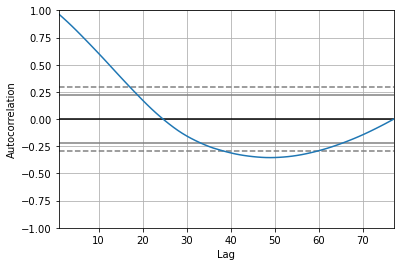

In [9]:
data_arima = dataIT[['Total_CasesIT']]
print(data_arima.head())
pd.plotting.autocorrelation_plot(data_arima)
plt.show()

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   77
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -607.022
Date:                Sat, 18 Apr 2020   AIC                           1226.043
Time:                        17:18:57   BIC                           1240.028
Sample:                             0   HQIC                          1231.632
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5461      0.097      5.630      0.000       0.356       0.736
ar.L2          0.4465      0.123      3.628      0.000       0.205       0.688
ar.L3         -0.2345      0.162     -1.451      0.1

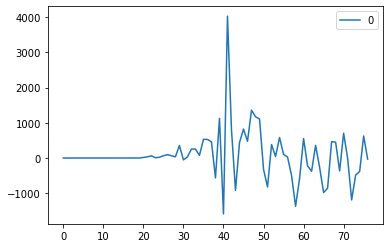

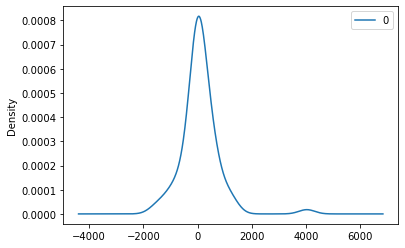

                 0
count    77.000000
mean     85.924906
std     699.204428
min   -1587.121048
25%      -9.049711
50%       1.000000
75%     358.427717
max    4024.325997


In [10]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_arima.values, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=59798.743068, expected=59138.000000
predicted=65086.018871, expected=63927.000000
predicted=68909.482150, expected=69176.000000
predicted=74260.391165, expected=74386.000000
predicted=79885.954856, expected=80589.000000
predicted=86319.839669, expected=86498.000000
predicted=92483.345321, expected=92472.000000
predicted=98229.321652, expected=97689.000000
predicted=103172.522402, expected=101739.000000
predicted=106408.083920, expected=105792.000000
predicted=109936.386586, expected=110574.000000
predicted=115449.849876, expected=115242.000000
predicted=120215.613973, expected=119827.000000
predicted=124288.764249, expected=124632.000000
predicted=129211.728380, expected=128948.000000
predicted=133539.249039, expected=132547.000000
predicted=136450.186376, expected=135586.000000
predicted=138919.631986, expected=139422.000000
predicted=143146.258660, expected=143626.000000
predicted=147944.513103, expected=147577.000000
predicted=151562.598021, expected=152271.000000
predicte

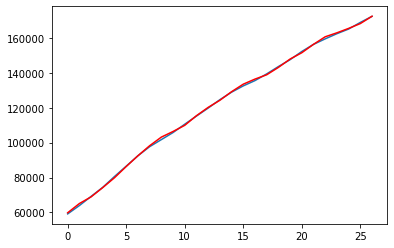

In [11]:
from sklearn.metrics import mean_squared_error

X = data_arima.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [55]:
import datetime
#data_arima.head()
data_arima.reset_index(inplace=True)
xn = datetime.datetime.strptime(data_arima.iloc[-1]['Date'], '%m/%d/%Y') + datetime.timedelta(days=5)
xn.strftime("%m/%d/%Y")

'04/03/2020'

In [12]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

import datetime
def predict_with_arima(data, days=5, y='Total_Cases', code='IT'):
    history = [x for x in data.values]
    news = []
    data_mod = data.reset_index()
    for i in range(days):
        print(history[-5:])
        model = Holt(history)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        history.append(np.array([round(yhat)]))
        
        xn = datetime.datetime.strptime(data_mod.iloc[-1]['Date'], '%m/%d/%y') + datetime.timedelta(days=i+1)
        
        news.append(
            pd.Series([xn.strftime("%m/%d/%y"), yhat], index=data_mod.columns )
        )
        
    data_mod = data_mod.append(news)
    data_mod.set_index('Date', inplace=True, drop=True)
    return history, data_mod

[array([159516]), array([162488]), array([165155]), array([168941]), array([172434])]
[array([162488]), array([165155]), array([168941]), array([172434]), array([175904.])]
[array([165155]), array([168941]), array([172434]), array([175904.]), array([179380.])]
[array([168941]), array([172434]), array([175904.]), array([179380.]), array([182856.])]
[array([172434]), array([175904.]), array([179380.]), array([182856.]), array([186332.])]
[array([175904.]), array([179380.]), array([182856.]), array([186332.]), array([189808.])]
[array([179380.]), array([182856.]), array([186332.]), array([189808.]), array([193284.])]
[array([182856.]), array([186332.]), array([189808.]), array([193284.]), array([196760.])]
[array([186332.]), array([189808.]), array([193284.]), array([196760.]), array([200236.])]
[array([189808.]), array([193284.]), array([196760.]), array([200236.]), array([203712.])]


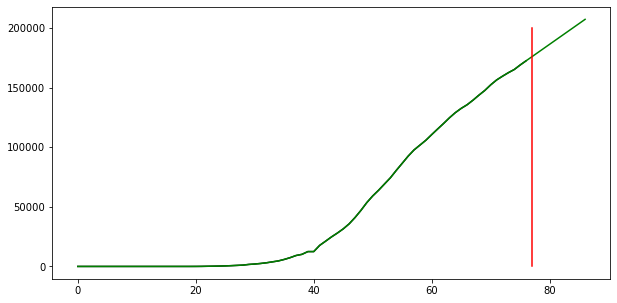

In [24]:
forecasted_data, dataset = predict_with_arima(dataIT[['Total_CasesIT']], code='IT', days=10)
plt.figure(figsize=(10, 5))
plt.plot(data_arima.values, color='black',)
plt.plot(forecasted_data, color='green')
plt.plot([dataIT[['Total_CasesIT']].shape[0],dataIT[['Total_CasesIT']].shape[0]],[200000,0],color='red')
#print(forecasted_data[-10:])
#print(dataset.tail(15))

In [107]:
print(data_arima.tail())

            Total_CasesIT
Date                     
03/24/2020          69176
03/26/2020          80589
03/27/2020          86498
03/28/2020          92472
03/29/2020          97689


/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:7

175920.6559421424
179480.4669873945
183040.27690201238
186600.08681191498
190159.89692320078
193719.7069187932
197279.51694000693
200839.3269710393
204399.13699821886
207958.9470255749


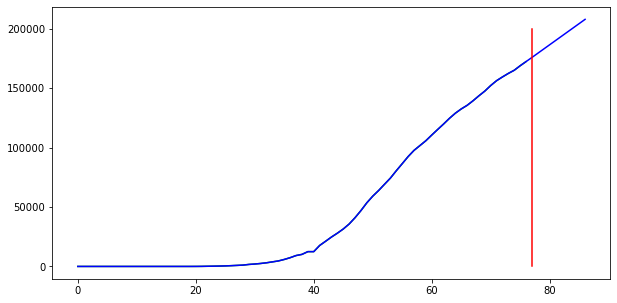

In [31]:
# Exponential Smoothening
from statsmodels.tsa.holtwinters import Holt

X = dataIT[['Total_CasesIT']].values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = Holt(history[t:])
    model_fit = model.fit(smoothing_level=0.8)
    output = model_fit.forecast()
    yhat = output[0]
    print(yhat)
    predictions.append(yhat)
    history.append(yhat)

# plot
plt.figure(figsize=(10, 5))
plt.plot(X, color='green',)
plt.plot(history, color='blue')
plt.plot([dataIT[['Total_CasesIT']].shape[0],dataIT[['Total_CasesIT']].shape[0]],[200000,0],color='red')
plt.show()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            Total_CasesIT
Date                     
2/01/20          2.000000
2/02/20          2.000000
2/03/20          2.000000
2/04/20          2.000000
2/05/20          2.000000
...                   ...
04/23/2020  196884.951876
04/24/2020  201139.847085
04/25/2020  205531.260655
04/26/2020  209540.372869
04/27/2020  213028.612615

[87 rows x 1 columns]
         ds       y
72  4/13/20  159516
73  4/14/20  162488
74  4/15/20  165155
75  4/16/20  168941
76  4/17/20  172434
         Total_CasesIT
Date                  
4/13/20         159516
4/14/20         162488
4/15/20         165155
4/16/20         168941
4/17/20         172434


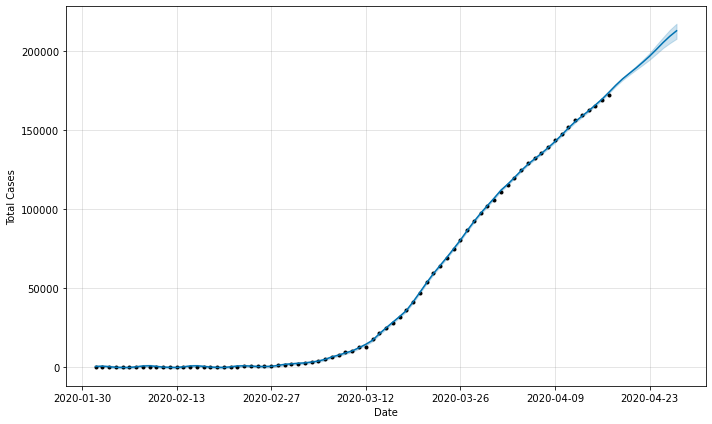

In [7]:
#PROPHET
from fbprophet import Prophet

tmp = dataIT[['Total_CasesIT']]
data_prophet = tmp.reset_index()
data_prophet = data_prophet.rename(columns={'Date': 'ds', 'Total_CasesIT': 'y'})

model_prophet = Prophet(changepoint_prior_scale=0.1)
model_prophet.fit(data_prophet)

data_prophet_forecast = model_prophet.make_future_dataframe(periods=10)
data_prophet_forecast = model_prophet.predict(data_prophet_forecast)

model_prophet.plot(data_prophet_forecast, xlabel = 'Date', ylabel = 'Total Cases')

dt = data_prophet_forecast[['ds','yhat']][-10:]
dt = dt.rename(columns={'ds': 'Date', 'yhat': 'Total_CasesIT'})
dt['Date'] = dt['Date'].dt.strftime('%m/%d/%Y')
dt.set_index('Date', inplace=True, drop=True)

tmpdata = dataIT.drop(columns=['New_Daily_CasesIT','New_Daily_DeathsIT','Total_DeathsIT','Total_RecoveriesIT'], axis=0)
tmpdata = tmpdata.append(dt)
print(tmpdata)
print(data_prophet.tail())
print(tmp.tail())

In [73]:
tmp = dataIT[['Total_CasesIT']]
tmp['Type'] = "prediction"
tmp
dataES[['Total_CasesES','Type']] = tmp
dataES

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total_CasesES,New_Daily_CasesES,New_Daily_DeathsES,Total_DeathsES,Total_RecoveriesES,Type
Date,,,,,,
01/31/2020,2,1,0,0,0,prediction
02/01/2020,2,0,0,0,0,prediction
02/02/2020,2,0,0,0,0,prediction
02/03/2020,2,0,0,0,0,prediction
02/04/2020,2,0,0,0,0,prediction
02/05/2020,2,0,0,0,0,prediction
02/06/2020,3,0,0,0,0,prediction
02/07/2020,3,0,0,0,0,prediction
02/08/2020,3,1,0,0,0,prediction


In [80]:
tt = dataES[['Total_CasesES']]
#tt.columns = ["a","b"]
print(tt.head())

            Total_CasesES
Date                     
01/31/2020              2
02/01/2020              2
02/02/2020              2
02/03/2020              2
02/04/2020              2


In [ ]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [63]:
train_values = dataIT[['Total_DeathsIT']][:-15]
test_values  = dataIT[['Total_DeathsIT']][-15:]

#ARIMA
arima_predictions = []
history = [x for x in train_values.values]
for i in range(15):
    model = ARIMA(history, order=(5,1,0), enforce_stationarity=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    history.append(np.array([round(yhat)]))
    arima_predictions.append(round(yhat))

#EXPONENTIAL SMOOTHENING
expo_predictions = []
history = [x for x in train_values.values]
for i in range(15):
    model = Holt(history[i:])
    model_fit = model.fit(smoothing_level=0.8)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(np.array([round(yhat)]))
    expo_predictions.append(round(yhat))
    
#Prophet
tmp = train_values
data_prophet = train_values.reset_index()
data_prophet.columns = ["ds","y"]
model_prophet = Prophet(changepoint_prior_scale=0.1)
model_prophet.fit(data_prophet)
data_prophet_forecast = model_prophet.make_future_dataframe(periods=15)
data_prophet_forecast = model_prophet.predict(data_prophet_forecast)

dt = data_prophet_forecast[['ds','yhat']][-15:]
dt = dt.rename(columns={'ds': 'Date', 'yhat': "Total_DeathsIT"})
dt['Date'] = dt['Date'].dt.strftime('%m/%d/%y')
dt.set_index('Date', inplace=True, drop=True)
prophet_predictions = dt.values

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
def create_dataset_v2(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [64]:
from sklearn.preprocessing import MinMaxScaler
values = train_values.values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

train_size = int(len(scaled))
train = scaled[0:train_size,:]
print(len(train))

trainX, trainY = create_dataset_v2(train, 5)

print(trainX.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 5, 1))

62
(57, 5)


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_ls = Sequential()
model_ls.add(LSTM(256,return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2])))
model_ls.add(Dropout(0.2))
model_ls.add(LSTM(256, return_sequences=True))
model_ls.add(Dropout(0.2))
model_ls.add(LSTM(256))
model_ls.add(Dropout(0.5))
model_ls.add(Dense(1, activation='linear'))
model_ls.compile(loss='mean_absolute_error', optimizer='sgd')

history = model_ls.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0, shuffle=False)

In [66]:
data = np.append(trainX[-1][1:],np.array(trainY[-1].reshape(1,-1)))
lstm_predictions = []
for i in range(15):
    prediction = model_ls.predict(data.reshape(1,5, 1))
    value = scaler.inverse_transform(prediction)[0][0]
    data = data[1:]
    data = np.append(data,np.array(prediction))
    lstm_predictions.append(round(value))

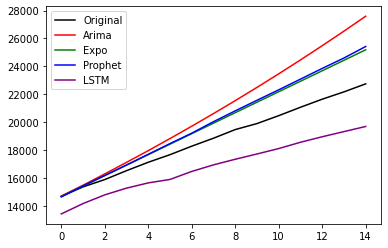

15 15 15


In [67]:
#Show predictions
plt.plot(test_values.values, color='black', label='Original')
plt.plot(arima_predictions, color='red', label='Arima')
plt.plot(expo_predictions, color='green', label='Expo')
plt.plot(prophet_predictions, color='blue', label='Prophet')
plt.plot(lstm_predictions, color='purple', label='LSTM')
plt.legend()
plt.show()


print(len(prophet_predictions), len(arima_predictions), len(expo_predictions))